In [1]:
#importing basic libraries
import pandas as pd#for data framing


In [2]:
a='spam.csv'
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [7]:
#droping unusefull columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
#changing the column name from v1,v2 to traget,text
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking null values
df.isnull().sum()

,0
target,0
text,0


In [14]:
#counting duplicated values
df.duplicated().sum()

403

In [15]:
#removing duplicate values
df = df.drop_duplicates(keep='first')

In [16]:
df.isnull().sum()

,0
target,0
text,0


In [17]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [18]:
df.duplicated().sum()

0

In [19]:
df.shape
#cleaned data

(5169, 2)

In [20]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
df['target'].value_counts()

,count
target,
0,4516
1,653


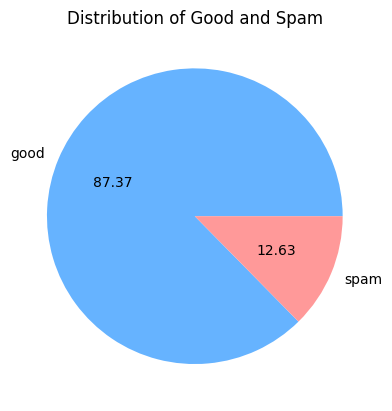

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['good', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Good and Spam')
plt.show()

In [23]:

import nltk
import numpy as np
nltk.download('punkt')
nltk.data.path.append('Users/Deepanshu221/AppData/Local/Programs/Python/Python312/Scripts/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
df['num_char'] = df['text'].apply(len)

In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
df[df['target']==1][['num_char', 'num_words', 'num_sentences']].describe()


,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
#importing seaborn
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

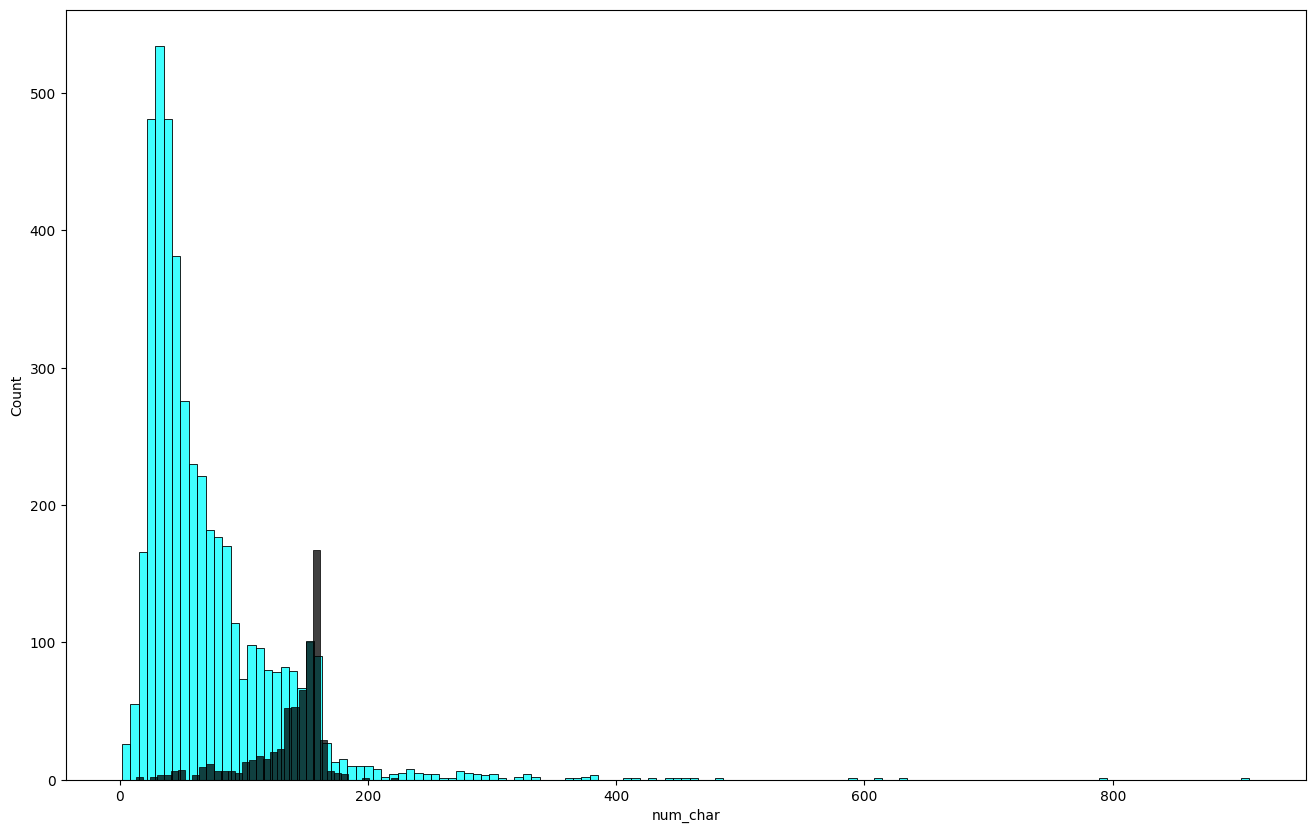

In [32]:
plt.figure(figsize=(16,10))
sns.histplot(df[df['target']==0]['num_char'],color='cyan')
sns.histplot(df[df['target']==1]['num_char'], color='black')

<ipython-input-33-e0e83af57758>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Greens')


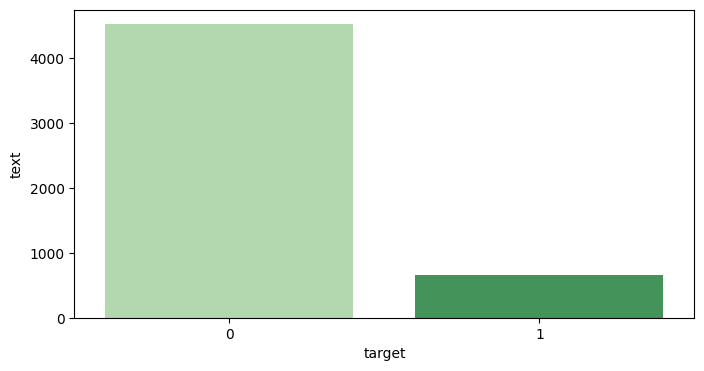

In [33]:
# target feature
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='target', palette='Greens')
plt.xlabel("target")
plt.ylabel("text")
plt.show()

In [34]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


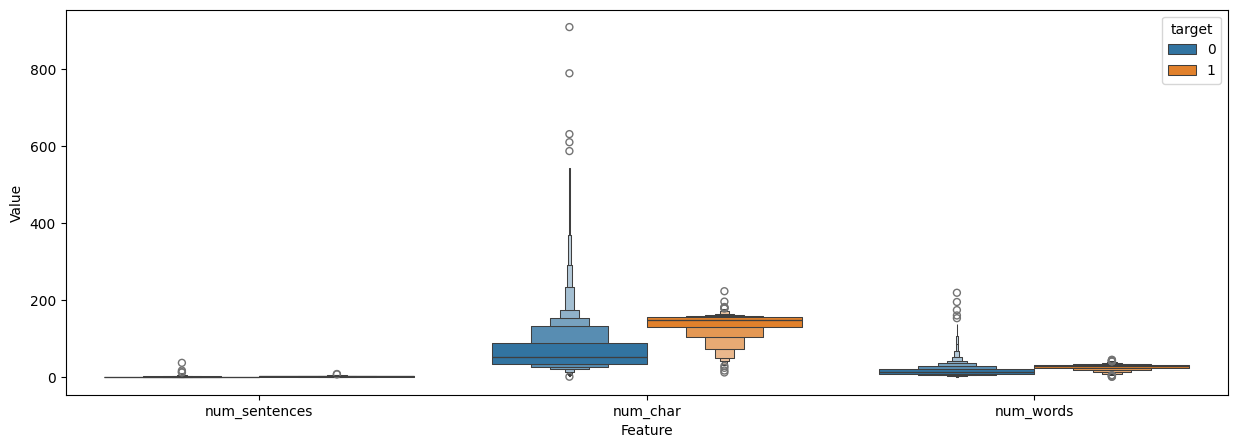

In [35]:
# Plotting Boxplot for outlier detection
melted_df = df.melt(id_vars='target', value_vars=['num_sentences', 'num_char', 'num_words'], var_name='Feature', value_name='Value')

plt.figure(figsize=(15,5))
sns.boxenplot(x='Feature', y='Value', data=melted_df, hue='target')
plt.show()

In [36]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [37]:
# Identifying Outliers Using IQR
column_name = 'num_char'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
outliers.index

Index([  53,  126,  154,  380,  424,  472,  550,  710,  837,  881, 1084, 1359,
       1384, 1512, 1578, 1585, 1826, 1862, 2009, 2011, 2064, 2089, 2133, 2157,
       2355, 2369, 2379, 2407, 2433, 2492, 2502, 2544, 2614, 2855, 2944, 3015,
       3039, 3058, 3105, 3225, 3304, 3349, 3452, 3516, 3564, 3730, 3736, 3777,
       3820, 3878, 4055, 4079, 4289, 4310, 4397, 4407, 4450, 4800, 4865, 4903,
       5003, 5082, 5209, 5451, 5515, 5557],
      dtype='int64')

In [38]:
df.drop(outliers.index, axis=0, inplace=True)

In [39]:
df.shape

(5103, 5)

In [40]:
# Function to clean the data
import re
def data_cleaning(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # replacing all non-alphabetix characters with space
    text = str.lower(text) # lowercasing
    text = text.split()    # splitting string into list
    text = ' '.join(text)  # join all items of the list
    return text


In [41]:
df['Clean Text'] = df['text'].apply(data_cleaning)

In [42]:
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [44]:
# Applying Word Tokenization & Creating new feature
df['Tokenized Text'] = df['Clean Text'].apply(lambda document: nltk.word_tokenize(document))

In [47]:
# Function to remove stopwords from tokenized text
def stopwords_removal(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text


# applying stopwords removal
df['Filtered Token'] = df['Tokenized Text'].apply(stopwords_removal)

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize
def lemmatizing(tokens):
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return lemmas


df['Lemmatized Tokens'] = df['Filtered Token'].apply(lemmatizing)

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
# Creating a corpus of Lemmatized Tokens
corpus = []
for tokens in df['Lemmatized Tokens']:
    document = ' '.join([word for word in tokens])
    corpus.append(document)

In [51]:
# Performing Vectorization and creating independent feature
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [52]:
y=df['target']

In [53]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#model making
classifier=RandomForestClassifier()

In [55]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = classifier.predict(X_test)

In [59]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100,'%')

97.74730656219393 %
